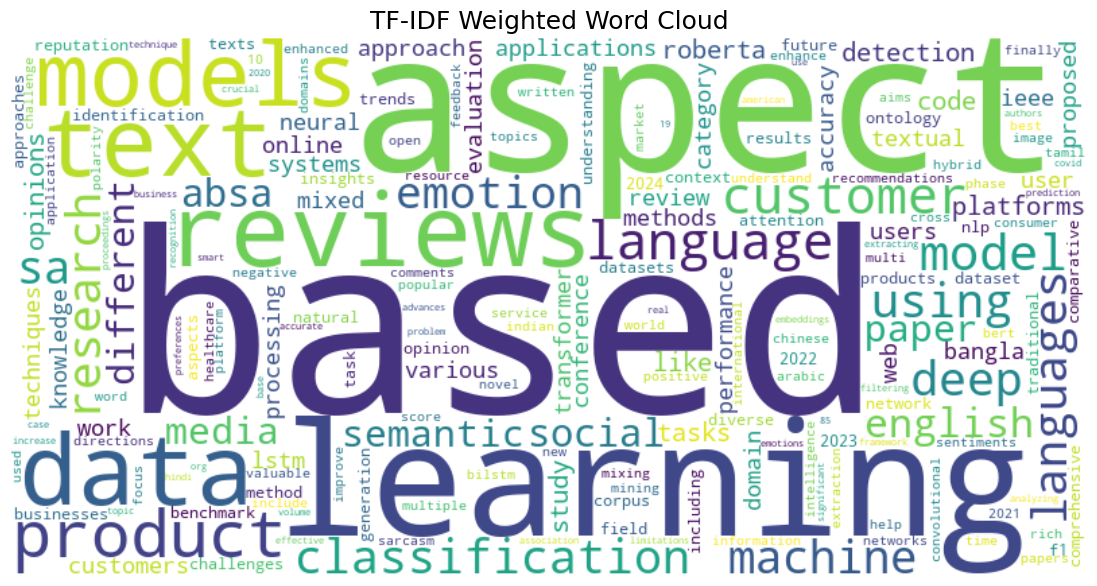

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel(r"C:\Users\CHARUSAT\Documents\PhD\scoupsdata.xlsx")
df['Combined'] = df['Title'].astype(str).str.lower() + ' ' + df['Abstract'].astype(str).str.lower()

# Vectorize
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.85, min_df=2)
X = vectorizer.fit_transform(df['Combined'].dropna())

# Generate WordCloud
tfidf_scores = X.mean(axis=0).A1
keywords = vectorizer.get_feature_names_out()
weights = dict(zip(keywords, (tfidf_scores / tfidf_scores.max() * 100).round(0).astype(int)))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(weights)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("TF-IDF Weighted Word Cloud", fontsize=18)
plt.show()
